# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

---

## Task 1 - Code review

This task is to write a code review, *not* to write python code to solve the problem brief.  

A colleague has been asked to write a program to calculate a root of a continuous function using the **bisection method** as described in the following brief:

---

### Brief

The bisection method is a simple numerical technique to find a root of a continuous function in an interval where this function changes sign. According to [Intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the continuous function $f=f(x)$ has at least one root in the interval $[a, b]$, if $f(a)f(b) \leq 0$. Utilising this fact, the following 3-step algorithm will find the root of such function within a desired accuracy:

1. Calculate the midpoint $c = (a+b)/2$ and evaluate the function at this point $f(c)$.
2. If $ (b-a)/2 < \epsilon_1 $ or $|f(c)| < \epsilon_2 $, then return $c$ as the root and stop. 
3. Otherwise, depending on the sign of $f(c)$ replace either $a$ or $b$ with $c$, such that $f(a)f(b) < 0$ for the new $a$ and $b$. Then go to step 1.

The criteria introduced in step 2 ensures the difference between the answer and the real root to be less than $\epsilon_1$ or _that_ the function value at the answer is smaller than $\epsilon_2$ (so it can be considered an approximate root). You are supposed to write a function that takes $a$, $b$, $\epsilon_1$ and $\epsilon_2$ as inputs and returns a root using the bisection method. 

Note that the bisection method does not guarantee or detect a change of sign in an interval if the two end points have similar signs. Hence, your program should first search for some subinterval where the function changes sign. This can be achieved by halving the intervals consecutively until in one of the smaller subinterval the function changes sign. If no such an interval is found while the size of the smallest interval is still bigger than $\epsilon_1$, the function returns 'None' and prints out "failed to find a root". 

Test your code for a continuous function on a given interval.  

### Your task:

You have been asked to write a review of their code. Here is the code they wrote:

In [2]:
from math import *

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001)
print('the root is', my_root)

1.0
the root is 1.0


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style
- Does it answer the brief?
- Does it work? If not_,_ could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

### Answer:

This code can work for most of inputs. But for some inputs, they will get wrong anwsers and even send errors. There are three problems in this code:

The first one is when input **`(a=0,b=3)`**, it gives the wrong root of **`1.5`**. This problem arises because the value of **`ff(c)`** at midpoint **`1.5`** is negtive and definitely less than $esp1$. It can be fixed by adding **`abs()`** to **`ff(c)`** so that the condition is **`abs(ff(c))<eps2`**.

The scecond one is when input **`(a=0,b=100)`**, it gives the error message of **`"list index out of range"`**. This is due to the number of value in **`subintervals`** is **`n+1`**, but in for loop, the number in index is **`2n-1`**. To fix this problem, I will use **`range(len(subintervals))`** insread **`range(n)`** and change **`i=j+1`** to **`i=j`**. it is feasible because **`list[-1]`** represent the last number in list.

The last one is when input **`(a=1.5,b=2.5)`**, it gives the root of 1.75. This should not happen because there is no root between them. And the value at this two points are both negtive, this will also cause some problems. We can fix it by changing the condition **`ff(subintervals[i])<0`** to **`ff(subintervals[i-1])<0 and ff(subintervals[i])>0`**.

Through three changes provided above, this code can get the root for any input.

From the code style aspect, the comment is concise and easy to understand. However, this code may cause some problems and can be more readable in some aspects. Since python cares about indentation, in the **`if-statement`**, the code is better to have a proper indentation. there are two places used $print$ function and no description to the outputs. Instead just print out the value, it will be better to add descriptions like **`"The subintervals are:"`** and **`"the midpoints are:"`** to the **`print`** function. It is also better not to use **`from math import *`**, because it will make the names in namespace unclear.

The code can be devided into two part. The first part is used to find a proper interval where the root is inside the interval. After the searching part, there will be two choices in the second part, either find or not. The second part is using bisection method to find the root from the proper interval. The code works as below:

1: Check whether the value of interval has different sign

2: **while** the interval does not have different sign **and** the piece length of original interval is greater than $esp1$ **do**

3: &nbsp;&nbsp;&nbsp;&nbsp;devide interval to n pieces and create subintervals in culmulative way

4: &nbsp;&nbsp;&nbsp;&nbsp;n becomes twice of its own

5: &nbsp;&nbsp;&nbsp;&nbsp;find subintervals with different sign in above data set

6: **end while**

7: **if** there is not proper intervals **then**

8: &nbsp;&nbsp;&nbsp;&nbsp;output "can not find root" derectly

9:**esle**

10: &nbsp;&nbsp;&nbsp;&nbsp;check whether the side points of interval are root

11: &nbsp;&nbsp;&nbsp;&nbsp;**if** not

12: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**while** the length of intervals are greater than $esp2$ **do**

13: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate the midpoint between the interval and assign the value of midpoint to the side point which sign of function value is the same as the midpoint

14: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**end while**

15: &nbsp;&nbsp;&nbsp;&nbsp;**end if**

16: **end if**

## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

In [70]:
"""
assuming that all of the chunks are run in sequence. The later chunks may not be 
able to work independently because it used functions difined above.
"""
import numpy as np

def updateR(traffic_model):
    """
    this model will accept current state of traffic model and 
    return the next state of traffic model
    """
    future_list = []
    N = len(traffic_model)
    for i in range(N):
        #check whether is the final car
        if i != N-1:
            #check the sate of the current cell
            if traffic_model[i] == 1:
                #check the state of the next cell
                if traffic_model[i+1] == 0:
                    future_list.append(0)
                else:
                    future_list.append(1)
            else:
                #check the state of the previous cell
                if traffic_model[i-1] == 0:
                    future_list.append(0)
                else:
                    future_list.append(1)
        else:
            if traffic_model[i] == 1:
                #if the final car, check the begining place
                if traffic_model[0] == 0:
                    future_list.append(0)
                else:
                    future_list.append(1)
            else:
                if traffic_model[i-1] == 0:
                    future_list.append(0)
                else:
                    future_list.append(1)
    return np.c_[future_list]

def primes(given):
    '''
    this function is used to return prime number in the given input
    '''
    import math
    prime = given
    j = 0
    cmp = prime[j]
    final_num = prime[-1]
    #remove each non-prime number
    while cmp <= math.sqrt(final_num):
        for i in prime:
            if i != cmp:
                if i % cmp == 0:
                    prime.remove(i)
        j += 1
        cmp = prime[j]
    return prime

#question 1
N = 9
traffic_model = np.zeros([N, 1], dtype = int)
traffic_model[[0, 3, 4, 5, 8]] = 1
print("Question 1: current traffic state is \n", traffic_model,
      "\n next traffic state is: \n", updateR(traffic_model))

# question 2

N1 = 100
T = 400
prime = primes(list(range(2, 101)))
#because index start from 0, so make prime minus 1
prime = list(np.array(prime) - 1)
traffic_model1 = np.zeros([N1, 1])
traffic_model1[prime] = 1
traffic_model1[40:54] = 1
#get the traffic state at Step T
for i in range(T):
    traffic_model1 = updateR(traffic_model1)
print("Question2: the position of the cars at 400 is: \n", traffic_model1)


Question 1: current traffic state is 
 [[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]] 
 next traffic state is: 
 [[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
Question2: the position of the cars at 400 is: 
 [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


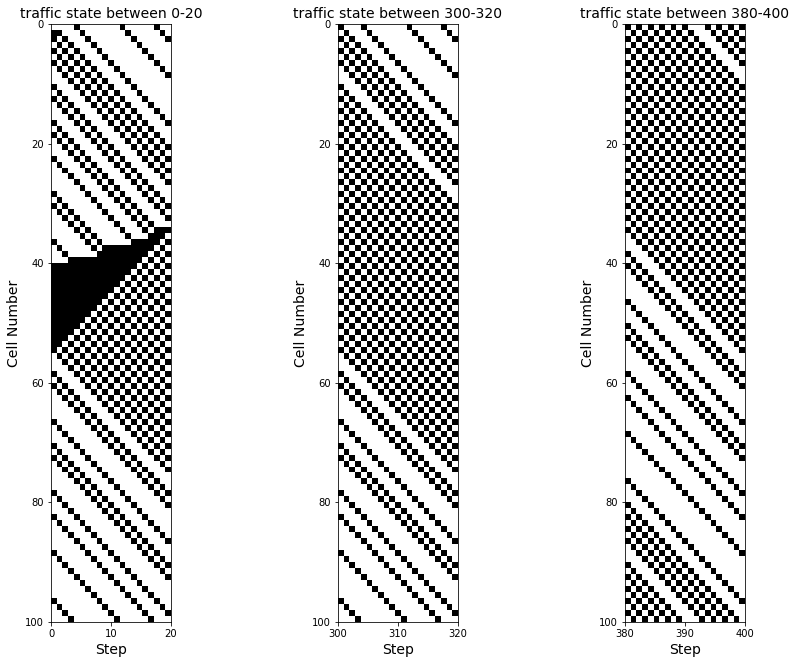

Question 3: the velocity at step 400 is 1.0


In [71]:
import matplotlib.pyplot as plt

T = 400
t1 = list(range(21))
t2 = list(range(300,321))
t3 = list(range(380,401))
traffic_model2 = np.zeros([N1, 1])
traffic_model2[prime] = 1
traffic_model2[40:55] = 1
total_model = traffic_model2
#store every state of traffic model in a total mdoel
for step in range(T):
    traffic_model2 = updateR(traffic_model2)
    total_model = np.append(total_model, traffic_model2, axis = 1)

a = total_model[:,t1]
b = total_model[:,t2]
c = total_model[:,t3]
# show the picture in time interval t1
fig1 = plt.figure(1, figsize = [15,20])
ax1 = fig1.add_subplot(161)
ax1.imshow(a, cmap = "Greys",
           extent = [0, 20, 100, 0])
ax1.set_ylabel('Cell Number', fontdict = {"fontsize": 14})
ax1.set_xlabel("Step", fontdict = {"fontsize": 14})
ax1.set_title("traffic state between 0-20", fontdict = {"fontsize": 14})
# show the picture in time interval t2
ax2 = fig1.add_subplot(163)
ax2.imshow(b, cmap = "Greys",
           extent = [300, 320, 100, 0])
ax2.set_ylabel('Cell Number', fontdict = {"fontsize": 14})
ax2.set_xlabel("Step", fontdict = {"fontsize": 14})
ax2.set_title("traffic state between 300-320", fontdict = {"fontsize": 14})
# show the picture in time interval t3
ax3 = fig1.add_subplot(165)
ax3.imshow(c, cmap = "Greys",
           extent = [380, 400, 100, 0])
ax3.set_ylabel('Cell Number', fontdict = {"fontsize": 14})
ax3.set_xlabel("Step", fontdict = {"fontsize": 14})
ax3.set_title("traffic state between 380-400", fontdict = {"fontsize": 14})
plt.show()


# question 3 discuss
"""
Assuming that when every car can move in current state, that means the traffic reaches a steady state.
At the end of the simulation, each cell i which has car in it doesn't has car in cell i+1. 
So, it reaches a steady state. 
Also, from the picture of 'traffic state between 380-400', we can find the pattern is stable, 
and it proves the traffic state is already stable before the end of simulation
"""
"""
Since the traffic state is steady in the end of the simulation, so it can be easily get the anwser----
the velocity at the end of the simulation is 1. 

Below is a function which can get the velocity at each step.
"""

def get_velocity(traffic_model):
    """
    This function will process a vector of traffic model and returns the velocity 
    at current state
    """
    velocity = 0
    total_car = 0
    N = len(traffic_model)
    #calculate the total number of cars and the number of cars which can move at next step
    for i in range(N):
        if i != N-1:
            if traffic_model[i] == 1:
                total_car += 1
                if traffic_model[i+1] == 0:
                    velocity += 1
        else:
            if traffic_model[i] == 1:
                total_car += 1
                if traffic_model[0] == 0:
                    velocity += 1
    return velocity / total_car
Step = 400
print("Question 3: the velocity at step", Step, "is", round(get_velocity(total_model[:,Step]), 2))

---

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:


1) Test your function **`new_position()`** by using the example above.

2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

In [74]:
def new_position(traffic_model, Traj):
    """
    given a traffic vector and the car position, and this function can return
    the next state
    """
    l = len(traffic_model)
    N = len(Traj)
    #check the index in Traj
    for i in range(N):
        #check whether is the final cell
        if Traj[i] % l != 0:
            #check whether the cell in trojectory has car
            if traffic_model[Traj[i] % l - 1] == 1:
                # check whether there is car in next position
                if traffic_model[Traj[i] % l] == 0:
                    Traj[i] += 1
        else:
            #check whether there is car in final cell
            if traffic_model[-1] == 1:
                if traffic_model[0] == 0:
                    Traj[i] += 1
    return Traj

def new_updateR(Traj, N):
    """
    given the position of cars, the function can return the traffic vector
    """
    r = np.zeros([N, 1])
    j = np.mod(Traj, N)
    r[j-1] = 1
    return r

def ave_vel(Traj, t):
    """
    given the position of cars and time t, the function can return the velocity 
    of total cars at time t
    """
    #if t is less than 0, then there is no movement of cars
    if t <= 0:
        return 0
    else:
        #velocity equal to the number of moved cars devide the number of total cars
        velocity = np.sum(Traj[:, t]-Traj[:, t-1]) / len(Traj)
    return velocity

traffic_model = np.c_[[1,0,1,1,0,1,0,1,0]]
Traj = np.c_[[3,4,6,8,10]]
print("Question 1: current example traffic Traj is \n", Traj, 
      "\n next example traffic Traj is: \n", new_position(traffic_model, Traj.copy()))

Question 1: current example traffic Traj is 
 [[ 3]
 [ 4]
 [ 6]
 [ 8]
 [10]] 
 next example traffic Traj is: 
 [[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]


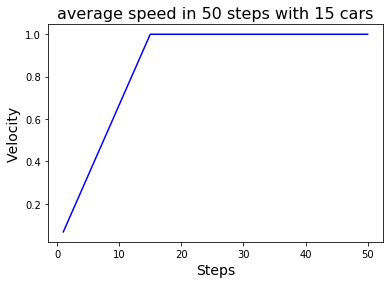

Question 2: it takes 14 steps for this traffic model to get an average steady speed. 


In [75]:
# the number of cars
M = 15
# the number of cells
N = 50
#the number of steps
T = 50
traffic_model = np.zeros([50,1], dtype = int)
traffic_model[list(range(M))] = 1
Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]
def get_Traj(traffic_model, Traj, T):
    """
    This function takes the traffic model vector, traffic position and
    the End simulation time, and returns the total trajectory of traffic 
    model in time T.
    """
    N = len(traffic_model)
    Total_Traj = Traj.copy()
    for i in range(T):
        #update the traffic position at each step
        Traj = new_position(traffic_model, Traj)
        #update r
        traffic_model = new_updateR(Traj, N)
        #get the total model in 50 step
        Total_Traj = np.append(Total_Traj, Traj, axis = 1)
    return Total_Traj

def get_T_velocity(Total_Traj):
    """
    This function takes the total trajectory and returns all the average velocity
    in an array
    """
    shape = np.shape(Total_Traj)
    velocity = np.array([])
    #combine new velocity and old velocity
    for i in range(1, shape[1]):
        velocity = np.append(velocity, (ave_vel(Total_Traj, i)))
    return velocity

Total_Traj = get_Traj(traffic_model, Traj, T)
velocity = get_T_velocity(Total_Traj)
#set x as a series of time and plot velocity with time
x = np.array(list(range(1, 51)))
fig2 = plt.figure(2)
plt.plot(x, velocity, '-b')
plt.title("average speed in 50 steps with 15 cars", fontsize = 16)
plt.xlabel("Steps", fontsize = 14)
plt.ylabel("Velocity", fontsize = 14)
plt.show()
#because in 15 step, the average speed get 1 and after 15 step, the speed did not change
print("Question 2: it takes 14 steps for this traffic model to get an average steady speed. ")

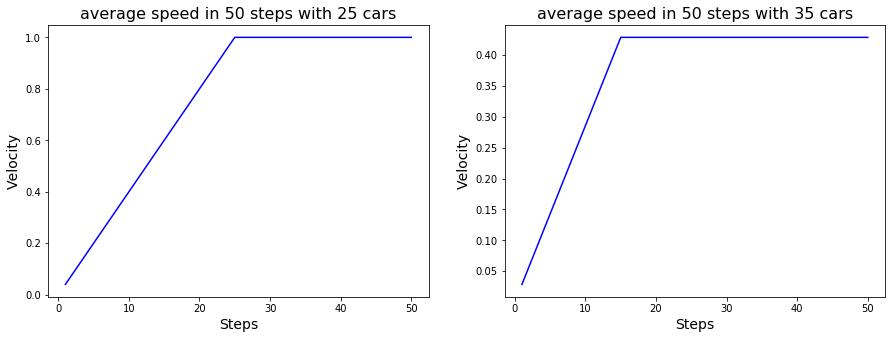

Question 3: from two figure, we can find model with 35 cars reached the steady average speed faster. 
The maximum average speed for two model is different, which are 1 for model with 25 cars and 0.4 for model with 35 cars.


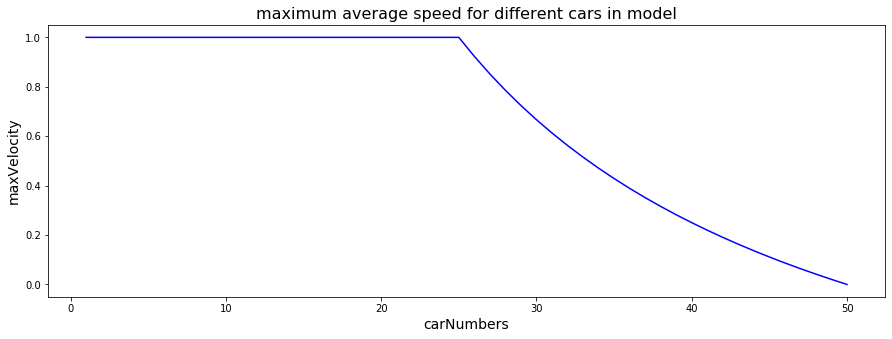

Question 3: from the 'maximum average speed for different cars in model', we can find the final average speed  is not the same for all M, The largest value of M for this model to reach the maximum speed is 25.


In [78]:
#for M = 25 and 35
M1 = 25
M2 = 35
#set the initial variable
N = 50
T = 50
def velocity_M(M, N, T):
    """
    This function take the cars number M, the number of cells, the final step 
    for all cars and return the average velocity 
    """
    traffic_model = np.zeros([N,1], dtype = int)
    traffic_model[list(range(M))] = 1
    Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]
    #get the performance
    Total_Traj = get_Traj(traffic_model, Traj, T)
    velocity = get_T_velocity(Total_Traj)
    return velocity

velocity_M25 = velocity_M(M1, N, T)
velocity_M35 = velocity_M(M2, N, T)
#set x as a series of time and plot velocity with time
x = np.array(list(range(1, 51)))
fig2 = plt.figure(2, figsize = [15,5])
#plot performance with M = 25
ax1 = fig2.add_subplot(121)
ax1.plot(x, velocity_M25, '-b')
ax1.set_title("average speed in 50 steps with 25 cars", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Velocity", fontsize = 14)
#plot performance with M = 35
ax1 = fig2.add_subplot(122)
ax1.plot(x, velocity_M35, '-b')
ax1.set_title("average speed in 50 steps with 35 cars", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Velocity", fontsize = 14)
plt.show()
#This is discuss for two model
print("Question 3: from two figure, we can find model with 35 cars reached the steady average speed faster. \n",
     "The maximum average speed for two model is different, which are 1 for model with 25 cars and 0.4 for model with 35 cars.",
      sep = "")
# maximum average speed for different cars in model
def max_velocity_M(M, N, T):
    """
    This function takes the number of celss and return the model performance with different 
    cars in cell. The number of cars is within the number of cells
    """
    temp = np.array([])
    for M in range(1, N+1):
        temp = np.append(temp, np.max(velocity_M(M, N, T)))
    return temp

vel_diff = max_velocity_M(M, N, T)
fig3 = plt.figure(3, figsize = [15, 5])
ax1 = fig3.add_subplot(111)
ax1.plot(x, vel_diff, '-b')
ax1.set_title("maximum average speed for different cars in model", fontsize = 16)
ax1.set_xlabel("carNumbers", fontsize = 14)
ax1.set_ylabel("maxVelocity", fontsize = 14)
plt.show()
#discuss
print("Question 3: from the 'maximum average speed for different cars in model', we can find the final average speed ",
     "is not the same for all M, The largest value of M for this model to reach the maximum speed is 25.")

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

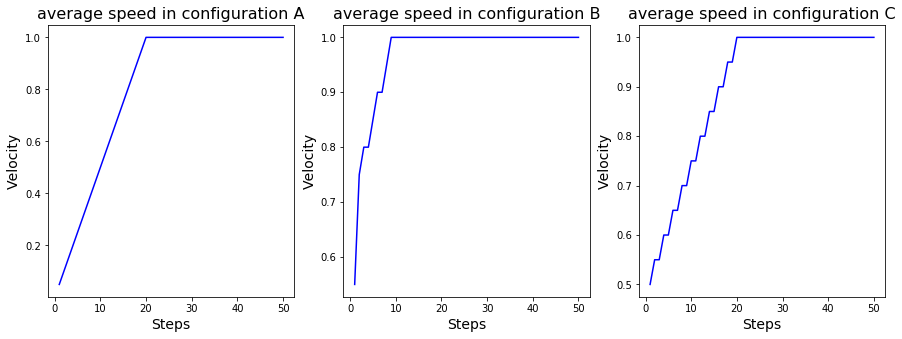

Question 4: from the 3 tables below, we can find that although the steady average speed is the samethe begining velocities are different and the increasing pattern is different. 
So, we can conculde that the average speed of the cars depend on their initial configuration.


In [79]:
import random
def vel_diff_cfg(traffic_model, T):
    N = len(traffic_model)
    Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]
    Total_Traj = get_Traj(traffic_model, Traj, T)
    velocity = get_T_velocity(Total_Traj)
    return velocity

N = 50
M = 20
T = 50
#get 3 different initial model configuration
tra_cfgA = np.zeros([N,1], dtype = int)
tra_cfgA[list(range(M))] = 1

tra_cfgB = np.zeros([N,1], dtype = int)
tra_cfgB[random.sample(range(0, N), M)] = 1
#get pairs wieh one cell space
pairs = np.array([], dtype = int)
i = 1
while len(pairs) < M:
    if i % 3 != 0:
        pairs = np.append(pairs, i)
    i += 1
tra_cfgC = np.zeros([N,1], dtype = int)
tra_cfgC[pairs] = 1

vel_cfgA = vel_diff_cfg(tra_cfgA, T)
vel_cfgB = vel_diff_cfg(tra_cfgB, T)
vel_cfgC = vel_diff_cfg(tra_cfgC, T)

#plot average speed of the cars in three cases
x = np.array(list(range(1, 51)))
fig4 = plt.figure(4, [15, 5])
ax1 = fig4.add_subplot(131)
ax1.plot(x, vel_cfgA, '-b')
ax1.set_title("average speed in configuration A", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Velocity", fontsize = 14)

ax2 = fig4.add_subplot(132)
ax2.plot(x, vel_cfgB, '-b')
ax2.set_title("average speed in configuration B", fontsize = 16)
ax2.set_xlabel("Steps", fontsize = 14)
ax2.set_ylabel("Velocity", fontsize = 14)

ax3 = fig4.add_subplot(133)
ax3.plot(x, vel_cfgC, '-b')
ax3.set_title("average speed in configuration C", fontsize = 16)
ax3.set_xlabel("Steps", fontsize = 14)
ax3.set_ylabel("Velocity", fontsize = 14)
plt.show()
#discuss
print("Question 4: from the 3 tables below, we can find that although the steady average speed is the same",
     "the begining velocities are different and the increasing pattern is different. \n",
     "So, we can conculde that the average speed of the cars depend on their initial configuration.", sep = "")

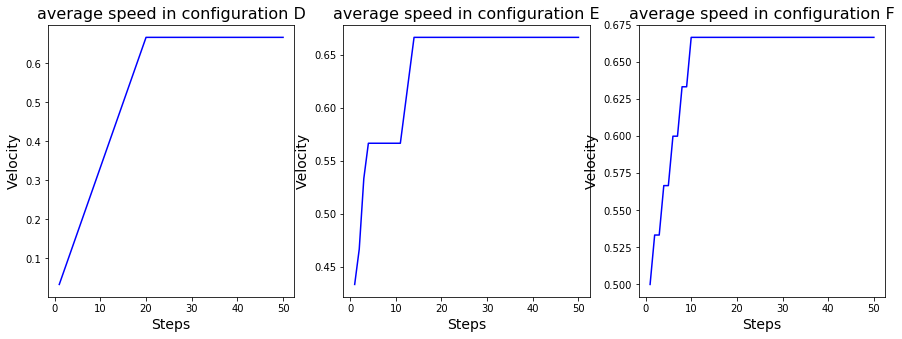

Question 5: these three models reach a different limit to the model with 20 cars and the limit velocity is 0.67.
From another aspect, These three models reach the same limit.


In [80]:
N = 50
M = 30
T = 50
#get 3 different initial model configuration with new car number 30
tra_cfgD = np.zeros([N,1], dtype = int)
tra_cfgD[list(range(M))] = 1

tra_cfgE = np.zeros([N,1], dtype = int)
tra_cfgE[random.sample(range(0, N), M)] = 1
#get pairs wieh one cell space
pairs = np.array([], dtype = int)
i = 1
while len(pairs) < M:
    if i % 3 != 0:
        pairs = np.append(pairs, i)
    i += 1
tra_cfgF = np.zeros([N,1], dtype = int)
tra_cfgF[pairs] = 1

vel_cfgD = vel_diff_cfg(tra_cfgD, T)
vel_cfgE= vel_diff_cfg(tra_cfgE, T)
vel_cfgF = vel_diff_cfg(tra_cfgF, T)

#plot average speed of the cars in three cases
x = np.array(list(range(1, 51)))
fig5 = plt.figure(5, [15, 5])
ax1 = fig5.add_subplot(131)
ax1.plot(x, vel_cfgD, '-b')
ax1.set_title("average speed in configuration D", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Velocity", fontsize = 14)

ax2 = fig5.add_subplot(132)
ax2.plot(x, vel_cfgE, '-b')
ax2.set_title("average speed in configuration E", fontsize = 16)
ax2.set_xlabel("Steps", fontsize = 14)
ax2.set_ylabel("Velocity", fontsize = 14)

ax3 = fig5.add_subplot(133)
ax3.plot(x, vel_cfgF, '-b')
ax3.set_title("average speed in configuration F", fontsize = 16)
ax3.set_xlabel("Steps", fontsize = 14)
ax3.set_ylabel("Velocity", fontsize = 14)
plt.show()
#discuss
print("Question 5: these three models reach a different limit to the model with 20 cars and the limit velocity is 0.67.\n",
     "From another aspect, These three models reach the same limit.", sep = "")

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

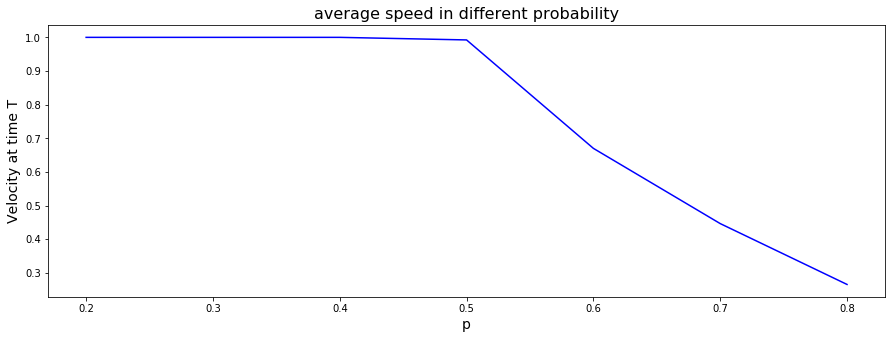

Question 6: from the figure, we can find with the higher p, the final average speed is smaller which means the road is more crowded.
The road's maximum capacity is the number of half cells, within the capacity, the average speed can reach the maximum. For more than half cells number cars, the road can not provide enough space between all cars which means there must be cars waiting behind another cars.
The more cars in the road, the more waiting cars and the less final average speed.


In [81]:
import scipy.stats as st

T = 200
N = 800
p = list(np.arange(0.2, 0.8, 0.1))
def get_vel_p(p, T, N):
    """
    This function takes probability p and return the velocity at T in each p 
    based on bernoulli distribution
    """
    vel = np.array([])
    for i in p:
        #get random car model based on different probability
        r = np.c_[st.bernoulli.rvs(i, size = N)]
        #get the final average velocity
        vel = np.append(vel, vel_diff_cfg(r, T)[-1])
    return vel

vel_N800 = get_vel_p(p, T, N)
#make plot
fig6 = plt.figure(6, figsize = [15, 5])
ax1 = fig6.add_subplot(111)
ax1.plot(p, vel_N800, '-b')
ax1.set_title("average speed in different probability", fontsize = 16)
ax1.set_xlabel("p", fontsize = 14)
ax1.set_ylabel("Velocity at time T", fontsize = 14)
plt.show()
#comment and discuss
print("Question 6: from the figure, we can find with the higher p, the final average speed is smaller which means the road is more crowded.\n",
     "The road's maximum capacity is the number of half cells, within the capacity, the average speed can reach the maximum. ",
     "For more than half cells number cars, the road can not provide enough space between all cars ",
     "which means there must be cars waiting behind another cars.\n",
     "The more cars in the road, the more waiting cars and the less final average speed.", sep = "")

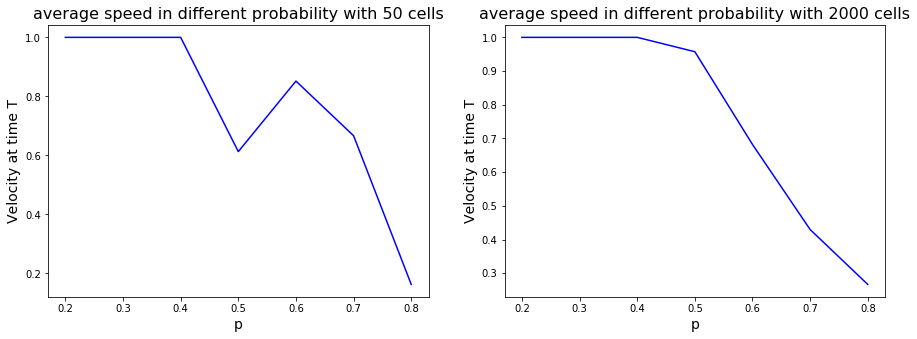

Question 7: the results changed. when we simulate for multiple times, we can find there exist some cases that the final average velocity in the model with 50 cells does not decrease when the p increases. For instance, the final velocity at p=0.6 is greater than p=0.5, but final velocity in the model of 20000 cells is always decrease.
This is due to the small cardinal number, since there is only 50 cells, so the number of cars with p=0.5 is probably greater than the number of cars with p=0.6


In [82]:
# test N = 50
N1 = 50
vel_N50 = get_vel_p(p, T, N1)
fig7 = plt.figure(7, figsize = [15, 5])
ax1 = fig7.add_subplot(121)
ax1.plot(p, vel_N50, '-b')
ax1.set_title("average speed in different probability with 50 cells", fontsize = 16)
ax1.set_xlabel("p", fontsize = 14)
ax1.set_ylabel("Velocity at time T", fontsize = 14)
#test N = 2000
N2 = 2000
vel_N2000 = get_vel_p(p, T, N2)
ax2 = fig7.add_subplot(122)
ax2.plot(p, vel_N2000, '-b')
ax2.set_title("average speed in different probability with 2000 cells", fontsize = 16)
ax2.set_xlabel("p", fontsize = 14)
ax2.set_ylabel("Velocity at time T", fontsize = 14)
plt.show()
#discuss
print("Question 7: the results changed. when we simulate for multiple times, we can find there exist some cases that the final average ",
     "velocity in the model with 50 cells does not decrease when the p increases. ",
     "For instance, the final velocity at p=0.6 is greater than p=0.5, but final velocity in the model of 20000 cells ",
     "is always decrease.\n",
     "This is due to the small cardinal number, since there is only 50 cells, so the number of cars with p=0.5 is ",
     "probably greater than the number of cars with p=0.6", sep = "")

---

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

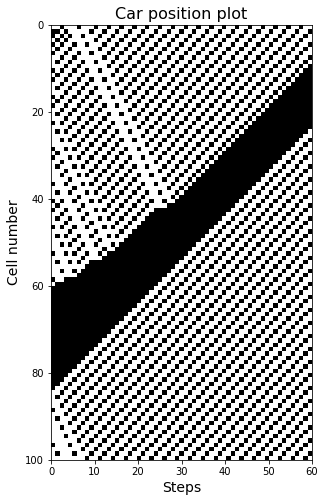

Question 1: the part of congested road will stay congested forever.
The congested part is moving from final cell to the begining cell


In [83]:
#assuming that all the chunks before are run in sequence.
N = 100
T = 60
#create a model with primes number and (60,85] is 1
traffic_model = np.zeros([N, 1])
prime = primes(list(range(2, 101)))
##because index start from 0, so make prime minus 1
prime = list(np.array(prime) - 1)
traffic_model[prime] = 1
traffic_model[60:84] = 1
Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]

def new_position2(traffic_model, Traj):
    """
    This function is the improved version of new_position(r, Traj), it can process the car which speed
    is more than 1. This function takes traffic vector, trajectory and velocity for each cars and returns
    new Traj and new Vel
    """
    l = len(traffic_model)
    N = len(Traj)
    Vel = np.zeros(Traj.shape)
    #check the index in Traj
    for i in range(N):
        #check whether is the final cell or second final cell
        if Traj[i] % l != 0 and Traj[i] % l != l-1:
            #check whether the cell in current position has car
            if traffic_model[Traj[i] % l - 1] == 1:
                # check whether there is car in next position
                if traffic_model[Traj[i] % l] == 0:
                    #check whether there is car in next position
                    if traffic_model[Traj[i] % l + 1] == 0:
                        Traj[i] += 2
                        Vel[i] += 2
                    else:
                        Traj[i] += 1
                        Vel[i] += 1
        elif Traj[i] % l == 0:
            #check whether there is car in final cell
            if traffic_model[-1] == 1:
                if traffic_model[0] == 0:
                    if traffic_model[1] == 0:
                        Traj[i] += 2
                        Vel[i] += 2
                    else:
                        Traj[i] += 1
                        Vel[i] += 1
        elif Traj[i] % l == l-1:
            if traffic_model[-2] == 1:
                if traffic_model[-1] == 0:
                    if traffic_model[0] == 0:
                        Traj[i] += 2
                        Vel[i] += 2
                    else:
                        Traj[i] += 1
                        Vel[i] += 1
                        
    return Traj, Vel
# from the loop, get the updated traffic model from 0-T
T_tra_md = traffic_model.copy()
for i in range(T):
    new_Traj, new_Vel = new_position2(traffic_model, Traj)
    traffic_model = new_updateR(new_Traj, N)
    T_tra_md = np.append(T_tra_md, traffic_model, axis = 1)
#plot the figrue
fig8 = plt.figure(8, figsize = [8, 8])
ax1 = fig8.add_subplot(111)
ax1.imshow(T_tra_md, cmap = "Greys",
           extent = [0, 60, 100, 0])
ax1.set_title("Car position plot", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Cell number", fontsize = 14)
plt.show()
#discuss
print("Question 1: the part of congested road will stay congested forever.\n",
     "The congested part is moving from final cell to the begining cell", sep = "")

2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

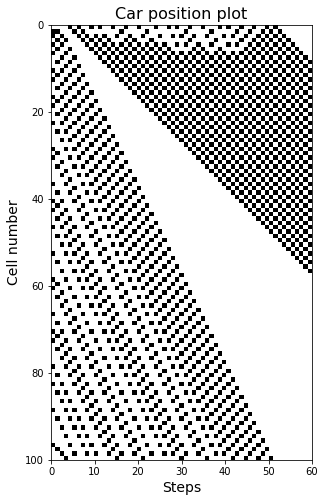

Question 2: The slow car decide how fast the traffic speed.


In [84]:
#assuming that all the chunks before are run in sequence.
N = 100
T = 60
#create a model with primes number and (60,85] is 1
traffic_model = np.zeros([N, 1])
prime = primes(list(range(2, 101)))
##because index start from 0, so make prime minus 1
prime = list(np.array(prime) - 1)
traffic_model[prime] = 1
Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]
Vel = np.ones(Traj.shape) * 2
Vel[-1] = 1
def new_position3(traffic_model, Traj, Vel):
    """
    This function can process the slow cars and fast cars. Given the traffic model ,trajector and 
    the type of cars and return the new Traj
    """
    l = len(traffic_model)
    N = len(Traj)
    #check the index in Traj
    for i in range(N):
        #check whether is the final cell or second final cell
        if Traj[i] % l != 0 and Traj[i] % l != l-1:
            Traj = update_pos(Traj[i] % l - 1, Traj[i] % l, Traj[i] % l + 1,
                              traffic_model, Traj, i, Vel[i])
        elif Traj[i] % l == 0:
            Traj = update_pos(-1, 0, 1, traffic_model, Traj, i , Vel[i])
        elif Traj[i] % l == l-1:
            Traj = update_pos(-2, -1, 0, traffic_model, Traj, i , Vel[i])
                        
    return Traj

def update_pos(first, second, third, traffic_model, Traj, i, n):
    """
    This function takes three position, traffic_model, Traj, velocity of individual car
    and returns the updated Traj
    """
    if n == 2:
        #check whether the cell in current position has car
        if traffic_model[first] == 1:
            # check whether there is car in next position
            if traffic_model[second] == 0:
                #check whether there is car in next position
                if traffic_model[third] == 0:
                    Traj[i] += 2
                else:
                    Traj[i] += 1
    elif n == 1:
        #check whether the cell in current position has car
        if traffic_model[first] == 1:
            # check whether there is car in next position
            if traffic_model[second] == 0:
                Traj[i] += 1
    return Traj
#get total traffic model
T_tra_md = traffic_model.copy()
for i in range(T):
    new_Traj = new_position3(traffic_model, Traj, Vel)
    traffic_model = new_updateR(new_Traj, N)
    T_tra_md = np.append(T_tra_md, traffic_model, axis = 1)

fig9 = plt.figure(9, [8, 8])
ax1 = fig9.add_subplot(111)
ax1.imshow(T_tra_md, cmap = "Greys",
           extent = [0, T, N, 0])
ax1.set_title("Car position plot", fontsize = 16)
ax1.set_xlabel("Steps", fontsize = 14)
ax1.set_ylabel("Cell number", fontsize = 14)
plt.show()
#discuss
print("Question 2: The slow car decide how fast the traffic speed.")

In [86]:
T = 100
#create a model with primes number and (60,85] is 1
traffic_model = np.zeros([N, 1])
prime = primes(list(range(2, 101)))
##because index start from 0, so make prime minus 1
prime = list(np.array(prime) - 1)
traffic_model[prime] = 1
Traj = np.c_[([i+1 for i in range(N) if traffic_model[i] == 1])]
Vel = np.ones(Traj.shape) * 2
Vel[-1] = 1

#get total traffic model
T_tra_md = traffic_model.copy()
for i in range(T):
    new_Traj = new_position3(traffic_model, Traj, Vel)
    traffic_model = new_updateR(new_Traj, N)
    T_tra_md = np.append(T_tra_md, traffic_model, axis = 1)

velocity = get_velocity(T_tra_md[:,T])
print("Question 3: the average velocity at the final time 100 is", velocity)

Question 3: the average velocity at the final time 100 is 1.0
